In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading file
file_path = '/Users/meliscan/machineProject/electricity_data.csv'

data = pd.read_csv(file_path)

# Combining the Date and Time columns and converting them to datetime type
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Filtering rows where the minute is 0
hourly_data = data[data['datetime'].dt.minute == 0]

# Removing the original Date and Time columns
del hourly_data['Date']
del hourly_data['Time']

# Saving or inspecting the filtered dataset
hourly_data.reset_index(inplace=True, drop=True)  # To reset the index
print(hourly_data.head())

# Save the filtered data to a new CSV file 
hourly_data.to_csv('hourly_electricity_data.csv', index=False)

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.180   237.52              11.8             0.0   
1                  0.088   231.99              17.4             0.0   
2                  0.078   232.43              13.8             0.0   
3                  0.072   236.76              14.0             0.0   
4                  0.170   236.03              14.6             0.0   

   Sub_metering_2  Sub_metering_3  Global_active_power            datetime  
0             0.0            18.0                2.790 2006-12-16 18:00:00  
1             1.0            17.0                4.070 2006-12-16 19:00:00  
2             0.0            16.0                3.206 2006-12-16 20:00:00  
3             0.0            17.0                3.314 2006-12-16 21:00:00  
4             1.0            17.0                3.464 2006-12-16 22:00:00  


In [8]:
file_path2 = '/Users/meliscan/machineProject/hourly_electricity_data.csv' 
hourly_data = pd.read_csv(file_path2)

hourly_data['datetime'] = pd.to_datetime(hourly_data['datetime'])

# Extract year, month, day, hour by adding new columns
hourly_data['year'] = hourly_data['datetime'].dt.year
hourly_data['month'] = hourly_data['datetime'].dt.month
hourly_data['day'] = hourly_data['datetime'].dt.day
hourly_data['hour'] = hourly_data['datetime'].dt.hour
hourly_data['weekday'] = hourly_data['datetime'].dt.weekday  # day of the week (0: monday, 6: sunday)

hourly_data = hourly_data.drop(columns=['datetime'])

# Remove missing data
hourly_data = hourly_data.dropna()

print(hourly_data.head())

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.180   237.52              11.8             0.0   
1                  0.088   231.99              17.4             0.0   
2                  0.078   232.43              13.8             0.0   
3                  0.072   236.76              14.0             0.0   
4                  0.170   236.03              14.6             0.0   

   Sub_metering_2  Sub_metering_3  Global_active_power  year  month  day  \
0             0.0            18.0                2.790  2006     12   16   
1             1.0            17.0                4.070  2006     12   16   
2             0.0            16.0                3.206  2006     12   16   
3             0.0            17.0                3.314  2006     12   16   
4             1.0            17.0                3.464  2006     12   16   

   hour  weekday  
0    18        5  
1    19        5  
2    20        5  
3    21        5  
4    22        5  


In [9]:
# Statistical summary
print(hourly_data.describe())

       Global_reactive_power       Voltage  Global_intensity  Sub_metering_1  \
count            34588.00000  34588.000000      34588.000000    34588.000000   
mean                 0.12354    240.718187          4.654426        1.108077   
std                  0.11277      3.217112          4.440797        6.077328   
min                  0.00000    225.540000          0.200000        0.000000   
25%                  0.04800    238.887500          1.400000        0.000000   
50%                  0.10000    240.840000          2.800000        0.000000   
75%                  0.19400    242.770000          6.400000        0.000000   
max                  1.21800    253.170000         37.600000       80.000000   

       Sub_metering_2  Sub_metering_3  Global_active_power          year  \
count    34588.000000    34588.000000         34588.000000  34588.000000   
mean         1.324799        6.505432             1.097415   2008.436683   
std          5.881935        8.408313             1

In [10]:
# Separate input (X) and target (y) variables
X = hourly_data.drop(columns=['Global_active_power']) 
y = hourly_data['Global_active_power'] 

# Split into training and temporary set (test + validation)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Data Size:", X_train.shape)
print("Test Data Size:", X_test.shape)
print("Validation Data Size:", X_val.shape)

Training Data Size: (24211, 11)
Test Data Size: (5188, 11)
Validation Data Size: (5189, 11)


In [11]:
# Building the model
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer specifying the input shape
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # First layer with L2 regularization 
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

2024-12-16 00:49:26.516336: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-16 00:49:26.516421: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-16 00:49:26.516444: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-16 00:49:26.516475: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 00:49:26.516496: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=25, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    verbose=1  
) 

Epoch 1/25


2024-12-16 00:49:57.232235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


757/757 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 26.1086 - mae: 2.5061 - val_loss: 0.5108 - val_mae: 0.3911
Epoch 2/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.4406 - mae: 0.4475 - val_loss: 0.2254 - val_mae: 0.0966
Epoch 3/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.8892 - mae: 0.6520 - val_loss: 0.2322 - val_mae: 0.1512
Epoch 4/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2216 - mae: 0.1051 - val_loss: 0.2222 - val_mae: 0.1280
Epoch 5/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.0376 - mae: 0.7114 - val_loss: 2.1311 - val_mae: 1.3776
Epoch 6/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7975 - mae: 0.5084 - val_loss: 2.0370 - val_mae: 1.3579
Epoch 7/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9268 - mae: 0.6602 - val_loss: 0.2102 - val_mae: 0.1521
Epoch 8/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9880 - mae: 0.6952 - val_loss: 0.5130 - val_mae: 0.5681
Epoch 9/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.8132

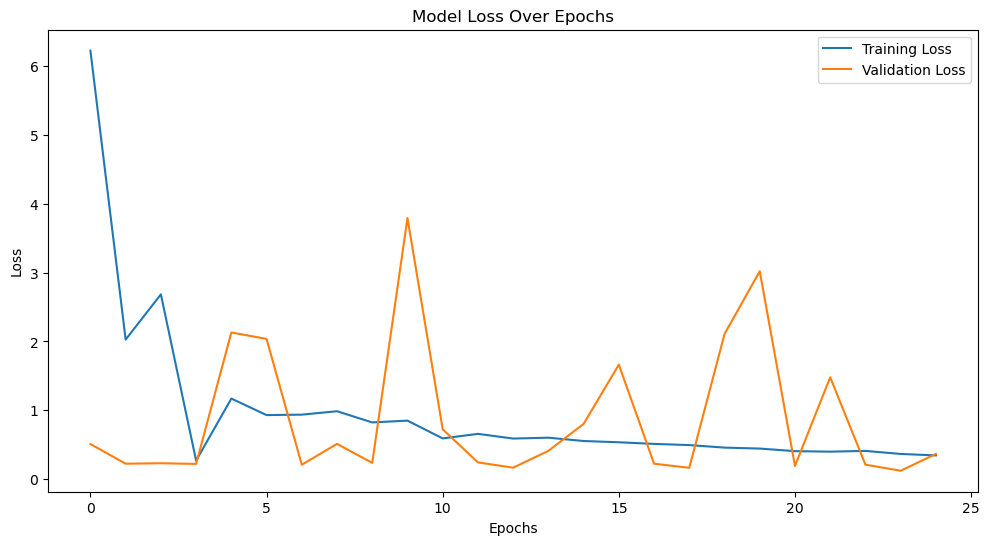

In [13]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

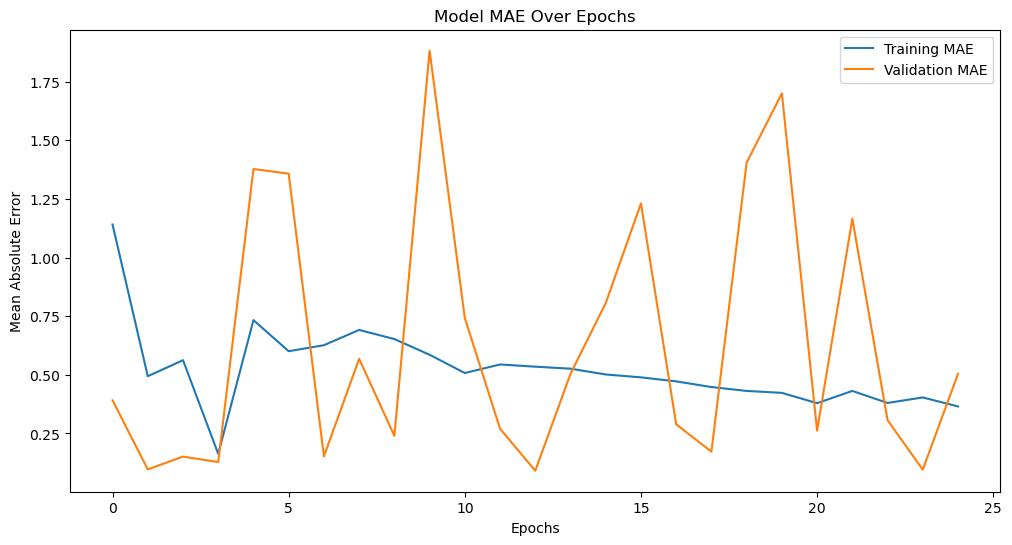

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Model MAE Over Epochs')
plt.legend()
plt.show()

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


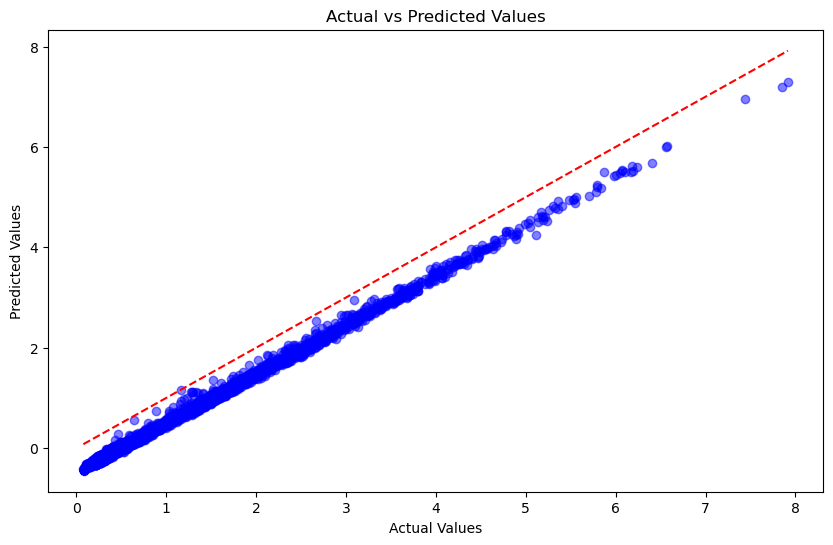

In [15]:
# Model predictions
y_pred = model.predict(X_val)

# Real vs Prediction Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Y=x doğrusu
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

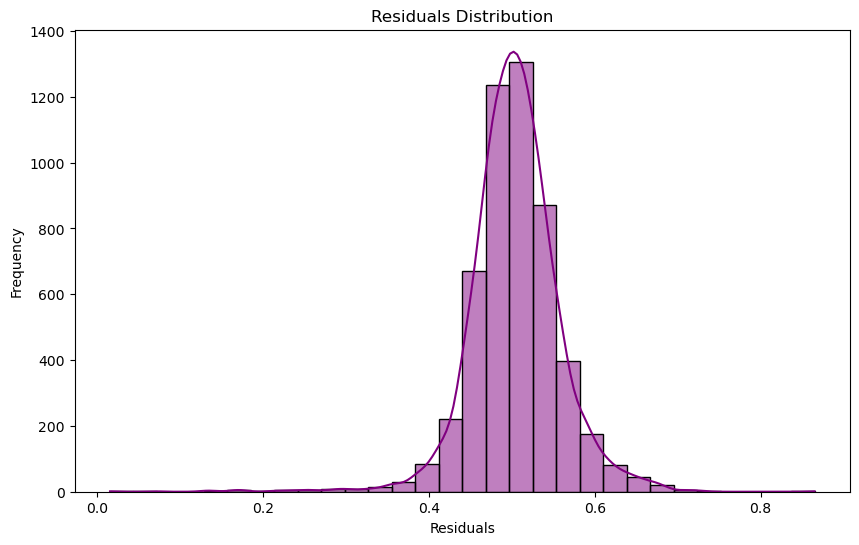

In [16]:
# Residuals 
residuals = y_val - y_pred.flatten()

# Histogram graph
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()